In [ ]:
#  Notebook: main.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Paths to metadata CSVs
df_20 = pd.read_csv("processed_data/df_20_meta.csv")
df_mini = pd.read_csv("processed_data/df_mini_meta.csv")

# Add source labels
df_20["dataset"] = "20_newsgroups"
df_mini["dataset"] = "mini_newsgroups"

# Merge both
df_merged = pd.concat([df_20, df_mini], ignore_index=True)
df_merged.head()


,filename,target,target_name,preprocessed_text,dataset
0,D:\Project_DC\data\20_newsgroups\comp.windows....,5,comp.windows.x,path cantaloupesrvcscmueducrabapplesrvcscmuedu...,20_newsgroups
1,D:\Project_DC\data\20_newsgroups\sci.med\58979,13,sci.med,xref cantaloupesrvcscmuedu scimed recfoodcooki...,20_newsgroups
2,D:\Project_DC\data\20_newsgroups\talk.politics...,16,talk.politics.guns,path cantaloupesrvcscmuedumagnesiumclubcccmued...,20_newsgroups
3,D:\Project_DC\data\20_newsgroups\misc.forsale\...,6,misc.forsale,path cantaloupesrvcscmuedurochesterudeldarwins...,20_newsgroups
4,D:\Project_DC\data\20_newsgroups\rec.sport.hoc...,10,rec.sport.hockey,newsgroups recsporthockey path cantaloupesrvcs...,20_newsgroups


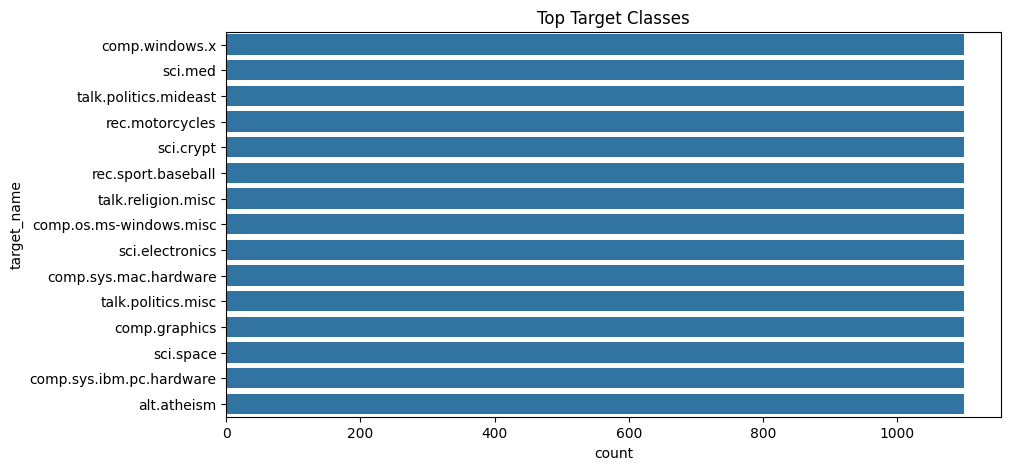

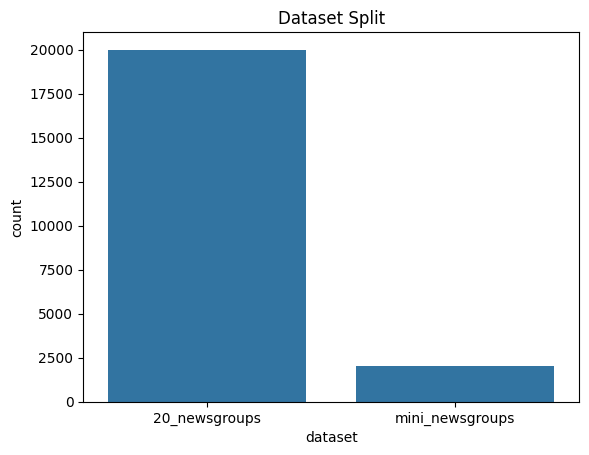

In [3]:
# Class distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df_merged, y="target_name", order=df_merged["target_name"].value_counts().index[:15])
plt.title("Top Target Classes")
plt.show()

# Dataset distribution
sns.countplot(data=df_merged, x="dataset")
plt.title("Dataset Split")
plt.show()


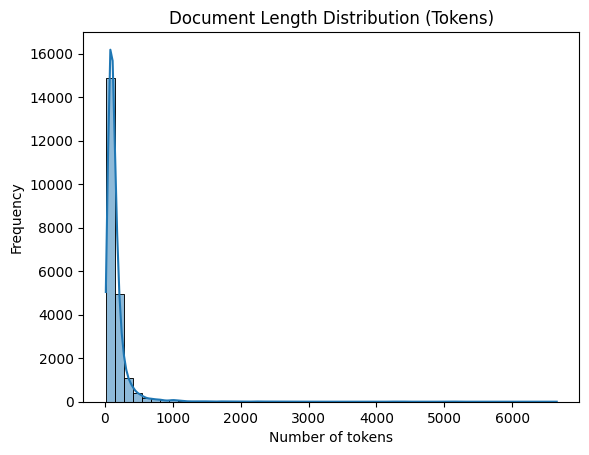

In [4]:
df_merged["text_len"] = df_merged["preprocessed_text"].apply(lambda x: len(str(x).split()))

sns.histplot(df_merged["text_len"], bins=50, kde=True)
plt.title("Document Length Distribution (Tokens)")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.show()


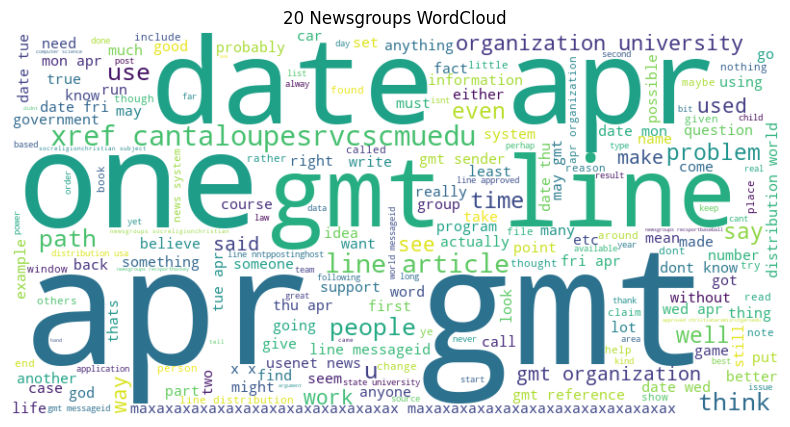

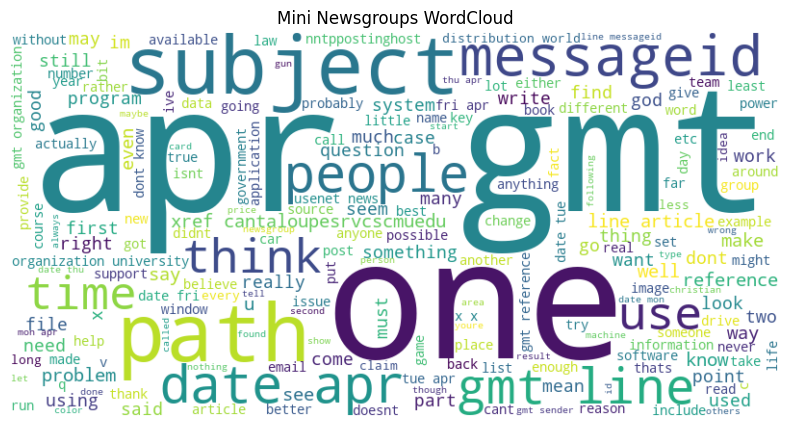

In [5]:
def generate_wordcloud(text_series, title):
    text = " ".join(text_series.dropna())
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_wordcloud(df_20["preprocessed_text"], "20 Newsgroups WordCloud")
generate_wordcloud(df_mini["preprocessed_text"], "Mini Newsgroups WordCloud")


In [6]:
df_merged.to_csv("processed_data/df_merged_meta.csv", index=False)
print("[INFO] Saved merged metadata to: processed_data/df_merged_meta.csv")


[INFO] Saved merged metadata to: processed_data/df_merged_meta.csv


In [7]:
# Optional: tag source
df_20["source"] = "20"
df_mini["source"] = "mini"

In [8]:
df_merged = pd.concat([df_20, df_mini], ignore_index=True)

In [ ]:
# Save merged CSV for future steps
df_merged.to_csv("processed_data/df_merged_meta.csv", index=False)
print("[INFO] Merged file saved as df_merged_meta.csv")

[INFO] Merged file saved as df_merged_meta.csv


In [ ]:
#  View available columns
print(df_merged.columns.tolist())

['filename', 'target', 'target_name', 'preprocessed_text', 'dataset', 'source']


In [ ]:
# Optional: Show unique topics
print("Unique topics (top 10):")
print(df_merged["target_name"].value_counts().head(10))

Unique topics (top 10):
target_name
comp.windows.x             1100
sci.med                    1100
talk.politics.mideast      1100
rec.motorcycles            1100
sci.crypt                  1100
rec.sport.baseball         1100
talk.religion.misc         1100
comp.os.ms-windows.misc    1100
sci.electronics            1100
comp.sys.mac.hardware      1100
Name: count, dtype: int64


In [11]:
filtered_df = df_merged[df_merged["target_name"] == "talk.religion.misc"]
filtered_df[["preprocessed_text", "target_name"]].to_csv("filtered_topic.csv", index=False)
print("[INFO] Filtered topic saved to filtered_topic.csv")


[INFO] Filtered topic saved to filtered_topic.csv
